In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split


In [2]:
# Load Engineered Data
df = pd.read_csv("Data/Employee_Data_Engineered.csv")
X = df.drop(columns=['PerformanceRating', 'PerformanceCategory'])
y = df['PerformanceCategory']


In [3]:
# Load saved models and scaler
log_reg = joblib.load('models/log_reg_model.pkl')
best_rf_clf = joblib.load('models/best_rf_model.pkl')
scaler = joblib.load('models/scaler.pkl')


In [4]:
# Scale data
X_scaled = scaler.transform(X)


In [5]:
# Train-Test Split (consistent with model training)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [6]:
# Logistic Regression Predictions
y_pred_log_reg = log_reg.predict(X_test)
log_reg_acc = accuracy_score(y_test, y_pred_log_reg)


In [7]:
# Tuned Random Forest Predictions
y_pred_rf_clf_best = best_rf_clf.predict(X_test)
rf_clf_acc_best = accuracy_score(y_test, y_pred_rf_clf_best)


In [8]:
# Evaluation Results - Logistic Regression
print("Logistic Regression Accuracy:", log_reg_acc)
print("\nLogistic Regression - Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_log_reg))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_log_reg))


Logistic Regression Accuracy: 0.7333333333333333

Logistic Regression - Confusion Matrix:
[[ 23   0   4]
 [  1  24   4]
 [ 21  34 129]]

Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.85      0.64        27
           1       0.41      0.83      0.55        29
           2       0.94      0.70      0.80       184

    accuracy                           0.73       240
   macro avg       0.62      0.79      0.66       240
weighted avg       0.83      0.73      0.75       240



In [9]:
# Evaluation Results - Random Forest (SMOTE)
print("\nRandom Forest (Tuned, SMOTE) Accuracy:", rf_clf_acc_best)
print("\nRandom Forest - Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf_clf_best))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf_clf_best))



Random Forest (Tuned, SMOTE) Accuracy: 0.9791666666666666

Random Forest - Confusion Matrix:
[[ 25   0   2]
 [  0  29   0]
 [  0   3 181]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        27
           1       0.91      1.00      0.95        29
           2       0.99      0.98      0.99       184

    accuracy                           0.98       240
   macro avg       0.97      0.97      0.97       240
weighted avg       0.98      0.98      0.98       240



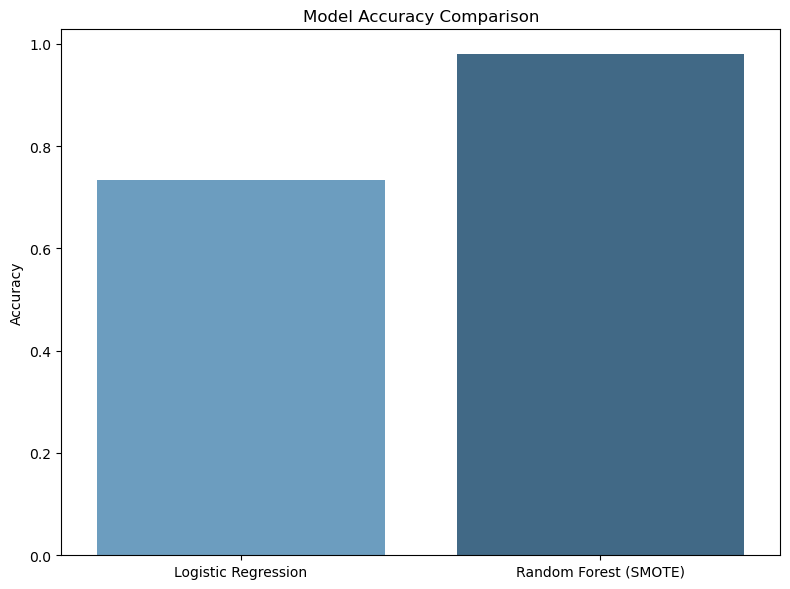

In [10]:
# Accuracy Comparison
models = ['Logistic Regression', 'Random Forest (SMOTE)']
accuracies = [log_reg_acc, rf_clf_acc_best]

plt.figure(figsize=(8, 6))
sns.barplot(x=models, y=accuracies, hue=models, palette='Blues_d', legend=False)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.show()

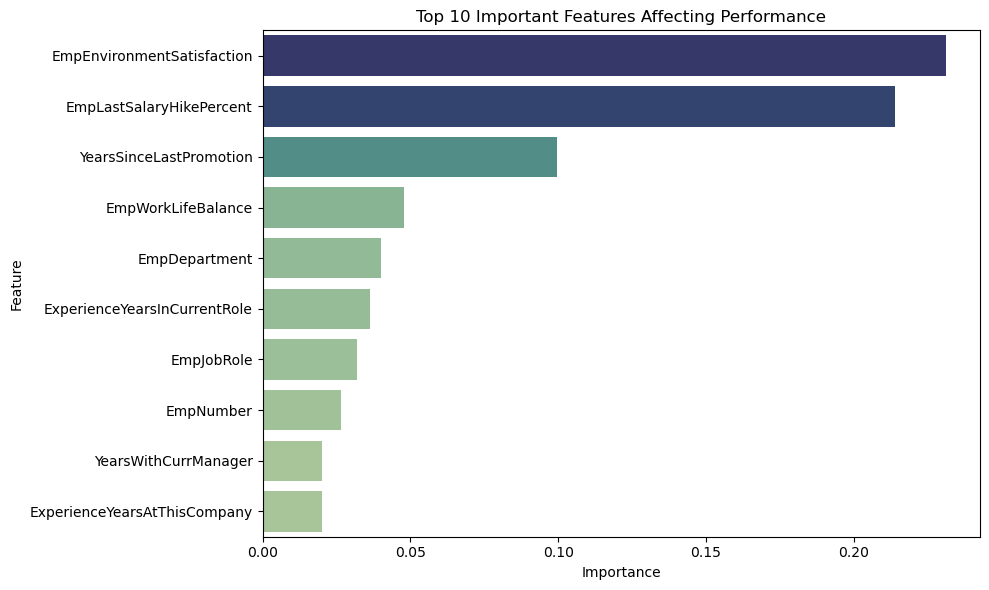

In [11]:
# Feature Importance - Random Forest
importances = best_rf_clf.feature_importances_
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(10), hue='Importance', palette='crest', legend=False)
plt.title("Top 10 Important Features Affecting Performance")
plt.tight_layout()
plt.savefig('reports/Top 10 important Features affecting Performance.png')
plt.show()

In [12]:
# Top 3 Influential Features
print("Top 3 Features Affecting Performance:")
print(importance_df.head(3))


Top 3 Features Affecting Performance:
                       Feature  Importance
10  EmpEnvironmentSatisfaction    0.231158
17    EmpLastSalaryHikePercent    0.214058
24     YearsSinceLastPromotion    0.099654


In [13]:
# Insights from Feature Importance
print("\nInsights from Feature Importance:")
print("- Most influential factor: EmpEnvironmentSatisfaction → workplace conditions affect productivity.")
print("- Second: EmpLastSalaryHikePercent → salary hikes influence motivation.")
print("- Third: YearsSinceLastPromotion → career growth impacts engagement.")



Insights from Feature Importance:
- Most influential factor: EmpEnvironmentSatisfaction → workplace conditions affect productivity.
- Second: EmpLastSalaryHikePercent → salary hikes influence motivation.
- Third: YearsSinceLastPromotion → career growth impacts engagement.


# Summary Section (Model Evaluation Recap)

### Objective:
This notebook evaluates the performance of classification models trained using SMOTE to address class imbalance in employee performance prediction.

### Key Steps:
- Loaded saved models and scaler from the model building notebook.
- Evaluated both models on the test data using:
  - Accuracy
  - Confusion Matrix
  - Classification Report
- Compared model accuracy via bar plots.
- Visualized **top 10 important features** using the tuned Random Forest model.
- Identified and interpreted **top 3 influential factors** impacting performance.

### SMOTE-Based Learning Outcome:
- SMOTE helped mitigate class imbalance, improving Random Forest’s ability to generalize across all categories.
- Logistic Regression still serves as a strong baseline.

### Top Features Affecting Performance:
1. **EmpEnvironmentSatisfaction** – Workplace conditions
2. **EmpLastSalaryHikePercent** – Salary hikes
3. **YearsSinceLastPromotion** – Career growth